In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
cols=["customer_unique_id","recommendedProducts","Unnamed: 2","Unnamed: 3","Unnamed: 4", "Unnamed: 5"]
data= pd.read_csv('recommendation.csv', usecols=cols)
data.head()

,customer_unique_id,recommendedProducts,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0000366f3b9a7992bf8c76cfdf3221e2,cfe6e9c01d0bbb5df9a75f0e3286baa9,aa3cf7c656b2a190d0baa54c3be0aed8,961d02e19e9ade3ba8aa028c87b0d8f7,eec68ed7d496bb2ee6aa0a69bb78acd2,827c4a77226a3e7ef259d61eaa775df9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0b33e28a934b68a0475650499b9ae509,efe572a7ee9cf0317bbcd4ec8b98a088,e4b0f340d2552f744b4c2d48dffbc0e2,4fbee589d3377144a90a338e4ae76dce,57c806e92eec9168ff2065cc65375576
2,0000f46a3911fa3c0805444483337064,0b33e28a934b68a0475650499b9ae509,efe572a7ee9cf0317bbcd4ec8b98a088,e4b0f340d2552f744b4c2d48dffbc0e2,4fbee589d3377144a90a338e4ae76dce,57c806e92eec9168ff2065cc65375576
3,0000f6ccb0745a6a4b88665a16c9f078,0b33e28a934b68a0475650499b9ae509,efe572a7ee9cf0317bbcd4ec8b98a088,e4b0f340d2552f744b4c2d48dffbc0e2,4fbee589d3377144a90a338e4ae76dce,57c806e92eec9168ff2065cc65375576
4,0004aac84e0df4da2b147fca70cf8255,0b33e28a934b68a0475650499b9ae509,efe572a7ee9cf0317bbcd4ec8b98a088,e4b0f340d2552f744b4c2d48dffbc0e2,4fbee589d3377144a90a338e4ae76dce,57c806e92eec9168ff2065cc65375576


In [82]:
#create n rows for n columns of customer_unique_id
df= data.set_index('customer_unique_id').stack().reset_index(name='Products')
df.drop("level_1", axis=1, inplace=True)
df.head()

,customer_unique_id,Products
0,0000366f3b9a7992bf8c76cfdf3221e2,cfe6e9c01d0bbb5df9a75f0e3286baa9
1,0000366f3b9a7992bf8c76cfdf3221e2,aa3cf7c656b2a190d0baa54c3be0aed8
2,0000366f3b9a7992bf8c76cfdf3221e2,961d02e19e9ade3ba8aa028c87b0d8f7
3,0000366f3b9a7992bf8c76cfdf3221e2,eec68ed7d496bb2ee6aa0a69bb78acd2
4,0000366f3b9a7992bf8c76cfdf3221e2,827c4a77226a3e7ef259d61eaa775df9


In [84]:
pd.set_option('display.max_columns', None)


In [85]:
#rename df Products column to product_id
df.rename(columns={'Products':'product_id'}, inplace=True)

In [86]:
df["product_category_name"]=np.nan


customer_unique_id            0
product_id                    0
product_category_name    470035
dtype: int64

In [96]:
products=pd.read_csv("08.products.csv")

In [97]:
#assign product_category_name to data based on product_category name in products dataset
zipped= list(zip(products["product_id"], products["product_category_name"]))


In [98]:
#transform zipped into dict
dict_zipped= dict(zipped)


In [101]:
dict_zipped

{'1e9e8ef04dbcff4541ed26657ea517e5': 'fragrance',
 '3aa071139cb16b67ca9e5dea641aaa2f': 'fabric',
 '96bd76ec8810374ed1b65e291975717f': 'sport outdoors',
 'cef67bcfe19066a932b7673e239eb23d': 'kids',
 '9dc1a7de274444849c219cff195d0b71': 'home accessories',
 '41d3672d4792049fa1779bb35283ed13': 'music instruments',
 '732bd381ad09e530fe0a5f457d81becb': 'comics',
 '2548af3e6e77a690cf3eb6368e9ab61e': 'furniture',
 '37cc742be07708b53a98702e77a21a02': 'ceiling fans',
 '8c92109888e8cdf9d66dc7e463025574': 'toys games',
 '14aa47b7fe5c25522b47b4b29c98dcb9': 'kitchen & dining',
 '03b63c5fc16691530586ae020c345514': 'kids',
 'cf55509ea8edaaac1d28fdb16e48fc22': 'music instruments',
 '7bb6f29c2be57716194f96496660c7c2': 'furniture',
 'eb31436580a610f202c859463d8c7415': 'home emergency kits',
 '3bb7f144022e6732727d8d838a7b13b3': 'sport outdoors',
 '6a2fb4dd53d2cdb88e0432f1284a004c': 'fragrance',
 'a1b71017a84f92fd8da4aeefba108a24': 'computer accessories',
 'a0736b92e52f6cead290e30b578413b6': 'furniture',
 

In [99]:
#assign dict_zipped to df["product_category_name"]
df["product_category_name"]= df["product_id"].map(dict_zipped)

In [103]:
#drop na
df.dropna(inplace=True)

In [104]:
cluster_data=pd.read_csv("data_for_geo.csv")
#rename customer_id to customer_unique_id
cluster_data.rename(columns={'customer_id':'customer_unique_id'}, inplace=True)

In [107]:
cluster_data

,Unnamed: 0,customer_unique_id,order_item_sequence_id,amount_prod_categories,price,transaction_value,shipping_cost,review_score,frequency,recency,R,F,M,RFM Score,Segment1,Cluster,type_of_client,customer_autonomous_community,customer_city,geo_latitude,geo_longitude,geo_admin1_code,geo_autonomous_community,cluster_value
0,0,9a736b248f67d166d2fbb006bcb877c3,138,75,77580,12179.0,140598,5.000000,75,385,1,5,4,154,Old firends,3,True Friends,Comunidad de Madrid,Madrid,40.41650,-3.70256,29.0,Comunidad de Madrid,0.476523
1,1,9a736b248f67d166d2fbb006bcb877c3,138,75,77580,12179.0,140598,5.000000,75,385,1,5,4,154,Old firends,3,True Friends,Comunidad de Madrid,Madrid,40.41650,-3.70256,29.0,Comunidad de Madrid,0.476523
2,2,6fbc7cdadbb522125f4b27ae9dee4060,57,38,303962,38646.0,86944,5.000000,38,340,2,5,5,255,Old firends,3,True Friends,Cataluña,Barcelona,41.38879,2.15899,56.0,Cataluña,0.541163
3,3,f9ae226291893fda10af7965268fb7f6,47,35,54365,94647.0,22819,1.942857,35,535,1,5,5,155,Old firends,3,True Friends,Andalucía,Cádiz,NaN,NaN,NaN,NaN,0.507631
4,4,f9ae226291893fda10af7965268fb7f6,47,35,54365,94647.0,22819,1.942857,35,535,1,5,5,155,Old firends,3,True Friends,Andalucía,Cádiz,NaN,NaN,NaN,NaN,0.507631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94089,94089,5b855416b6a0343aeb247df1750ea77d,1,1,7908,9688.0,178,5.000000,1,376,2,1,3,213,One time buyers,1,Strangers,Andalucía,Huelva,37.26638,-6.94004,51.0,Andalucía,0.469008
94090,94090,5b8515d0ff29f6655acc9bb8341b443a,1,1,149,16479.0,1579,2.000000,1,253,3,1,4,314,Average customers,0,Bernacles,Aragón,Zaragoza,41.65606,-0.87734,52.0,Aragón,0.488488
94091,94091,5b851034f9e2d218bd07a7d135682f77,1,1,80,929.0,129,5.000000,1,245,3,1,1,311,Average customers,0,Bernacles,Comunidad de Madrid,Madrid,40.41650,-3.70256,29.0,Comunidad de Madrid,0.476523
94092,94092,5b84c7275083452c0610be5c120c9dae,1,1,20999,24087.0,3088,5.000000,1,184,3,1,5,315,Average customers,0,Bernacles,Extremadura,Cáceres,NaN,NaN,NaN,NaN,0.629921


In [136]:
#creating two dictionaries, one maps customer to it's cluster and another customer to type of client
zip_cluster= dict(list(zip(cluster_data["customer_unique_id"], cluster_data["Cluster"])))
zip_segment= dict(list(zip(cluster_data["customer_unique_id"], cluster_data["type_of_client"])))

In [137]:
#creating two null columns and then fill with the values of the dictioanry
df["Cluster"]= np.nan
df["type_of_client"]= np.nan
df["Cluster"]= df["customer_unique_id"].map(zip_cluster)
df["type_of_client"]= df["customer_unique_id"].map(zip_segment)


In [138]:
df.dropna(inplace=True)


In [141]:
#export to csv
df.to_csv("recommended_cluster.csv")

Recommended product for cluster

In [3]:
recc= pd.read_csv("recommended_cluster.csv")

In [4]:
#for each costumer keep only the first entry
recco= recc.drop_duplicates(subset=["customer_unique_id"], keep="first")


In [5]:
#take the most present category on the first product recommended for each cluster

tab_of_categories=pd.crosstab(recco['product_category_name'], recco["type_of_client"]) 

In [13]:
tab_of_categories

type_of_client,Bernacles,Loyals,Strangers,True Friends
product_category_name,,,,
agriculture suppliers,0,0,3,0
automotive,100,9,142,0
beauty & personal care,541,34,256,2
bedroom decor,7,1,0,0
book,120,11,147,0
business office,35,3,0,0
cd vinyl,4,0,0,0
ceiling fans,20,1,5,0
cell phones,376,18,233,0


In [35]:
#clean the table removing product_category_name and type_of_clients as axis name
tab_of_categories=tab_of_categories.rename_axis(None).rename_axis(None, axis=1)
tab_of_categories

,Bernacles,Loyals,Strangers,True Friends
agriculture suppliers,0,0,3,0
automotive,100,9,142,0
beauty & personal care,541,34,256,2
bedroom decor,7,1,0,0
book,120,11,147,0
business office,35,3,0,0
cd vinyl,4,0,0,0
ceiling fans,20,1,5,0
cell phones,376,18,233,0
coffee machines,39,4,7,0


In [84]:
#for each type of customer select seven most present categories
bern = tab_of_categories.sort_values('Bernacles', ascending=False).head(7)
loyals= tab_of_categories.sort_values('Loyals', ascending=False).head(7)
Strangers=tab_of_categories.sort_values('Strangers', ascending=False).head(7)
Top=tab_of_categories.sort_values('True Friends', ascending=False).head(7)


# Data Visualization
Visualizing for each costumer most recommended categories

c:\Users\miro\anaconda3\envs\datavis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\miro\anaconda3\envs\datavis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\miro\anaconda3\envs\datavis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

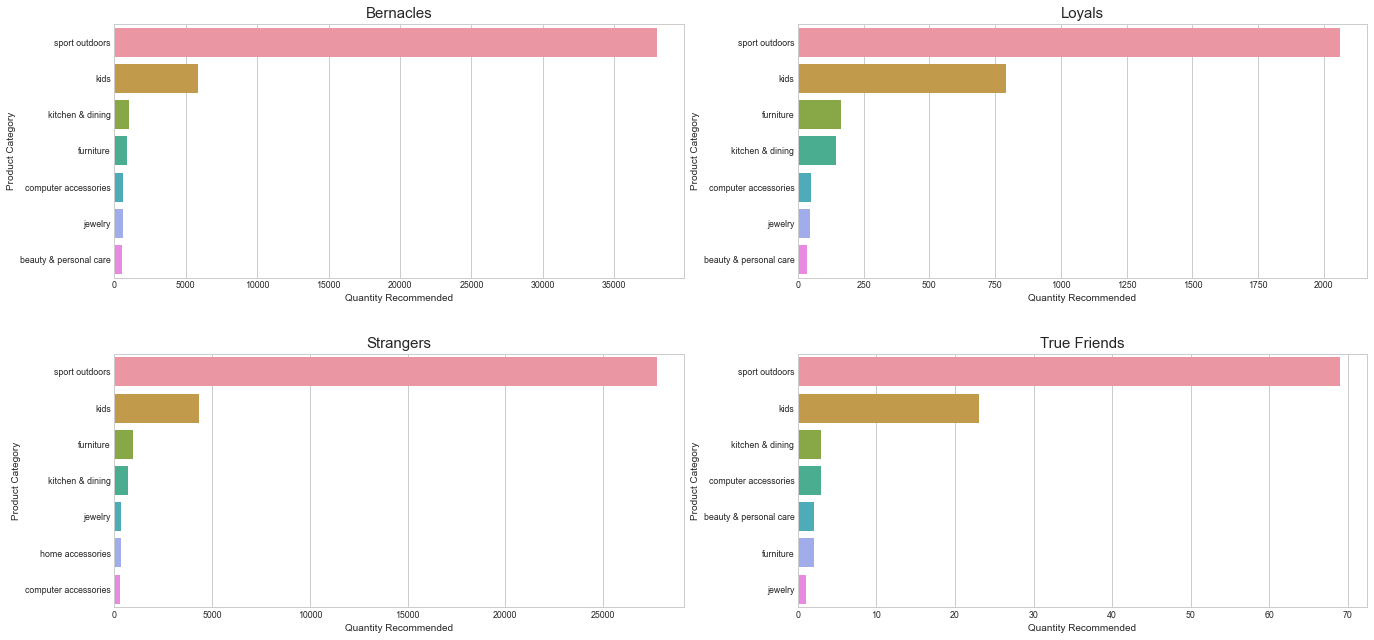

In [99]:
import matplotlib.pyplot as plt
#set white background
plt.style.use('seaborn-whitegrid')
#figzise of subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
plt.subplots_adjust( hspace=0.3)
sns.barplot(bern["Bernacles"],bern.index, orient="h", ax=ax[0,0])
#set title
ax[0,0].set_title("Bernacles", fontsize=15)
#set labels
ax[0,0].set_xlabel("Quantity Recommended", fontsize=10)
ax[0,0].set_ylabel("Product Category", fontsize=10)
sns.barplot(loyals["Loyals"],loyals.index, orient="h", ax=ax[0,1])
ax[0,1].set_title("Loyals", fontsize=15)
ax[0,1].set_xlabel("Quantity Recommended", fontsize=10)
ax[0,1].set_ylabel("Product Category", fontsize=10)
sns.barplot(Strangers["Strangers"],Strangers.index, orient="h", ax=ax[1,0])
ax[1,0].set_title("Strangers", fontsize=15)
ax[1,0].set_xlabel("Quantity Recommended", fontsize=10)
ax[1,0].set_ylabel("Product Category", fontsize=10)
sns.barplot(Top["True Friends"],Top.index, orient="h", ax=ax[1,1])
ax[1,1].set_title("True Friends", fontsize=15)
ax[1,1].set_xlabel("Quantity Recommended", fontsize=10)
ax[1,1].set_ylabel("Product Category", fontsize=10)
plt.show()
